<a href="https://colab.research.google.com/github/Someshwarms/NYCtaxi-trip-duration-predictions-using-ML/blob/main/NYCtaxi_trip_duration_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost
from geopy.distance import great_circle

**Importing all the files and the packages which is needed for this project.Link of the dataset:https://www.kaggle.com/c/nyc-taxi-trip-duration/data**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/nyctaxitripdurationdata.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
df.shape

(1458644, 11)

**As we can see after for null values in the result it shows there is not single null values in the columns**

In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

**Feature Extraction with the help of different column of the dataset**

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


**Extracting feature distance with the help of pickup and dropoff longitude and lattitude column of the dataset with the help package called geopy**

In [ ]:
def calculate_distance(pick_lat,pick_long,drop_lat,drop_long):
  start_coordinates=(pick_lat,pick_long)
  stop_coordinates=(drop_lat,drop_long)
  return great_circle(start_coordinates,stop_coordinates).km


df['distance']=df.apply(lambda x:calculate_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']),axis=1)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590


**Using datetime from pandas extracting hour,day,month,etc features from the pickup and dropoff datetime columns of the dataset**

In [ ]:
df['pickup_hour']=pd.to_datetime(df['pickup_datetime'],format="%Y-%m-%d %H:%M:%S").dt.hour 
df['dropoff_hour']=pd.to_datetime(df['dropoff_datetime'],format="%Y-%m-%d %H:%M:%S").dt.hour 
df['pickup_month']=pd.to_datetime(df['pickup_datetime'],format="%Y-%m-%d %H:%M:%S").dt.month 
df['dropoff_month']=pd.to_datetime(df['dropoff_datetime'],format="%Y-%m-%d %H:%M:%S").dt.month
df['pickup_day']=pd.to_datetime(df['pickup_datetime'],format="%Y-%m-%d %H:%M:%S").dt.day_name
df['dropoff_day']=pd.to_datetime(df['dropoff_datetime'],format="%Y-%m-%d %H:%M:%S").dt.day_name
df['pickup_day_no']=pd.to_datetime(df['pickup_datetime'],format="%Y-%m-%d %H:%M:%S").dt.weekday
df['dropoff_day_no']=pd.to_datetime(df['dropoff_datetime'],format="%Y-%m-%d %H:%M:%S").dt.weekday

In [ ]:
df.drop(['pickup_day','dropoff_day'],axis=1,inplace=True)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,17,17,3,3,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,0,0,6,6,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385108,11,12,1,1,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501,19,19,4,4,2,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,13,13,3,3,5,5


In [ ]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [ ]:
df['pickup_timeofday']=df['pickup_hour'].apply(time_of_day)
df['dropoff_timeofday']=df['dropoff_hour'].apply(time_of_day)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_timeofday,dropoff_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,17,17,3,3,0,0,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,0,0,6,6,6,6,Late night,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385108,11,12,1,1,1,1,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501,19,19,4,4,2,2,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,13,13,3,3,5,5,Afternoon,Afternoon


**Data Visualization**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


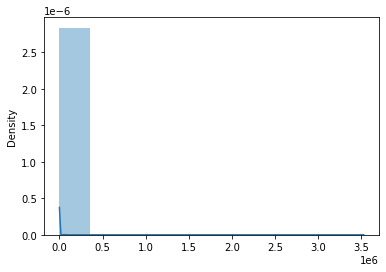

In [ ]:
sns.distplot(x=df['trip_duration'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


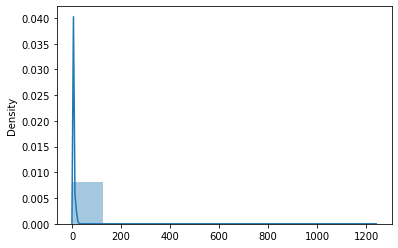

In [ ]:
sns.distplot(x=df['distance'],bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


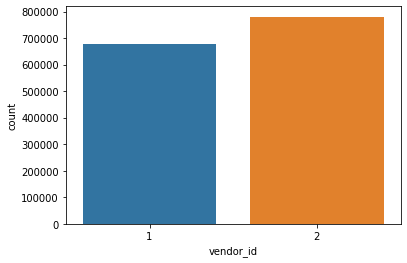

In [ ]:
sns.countplot('vendor_id',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


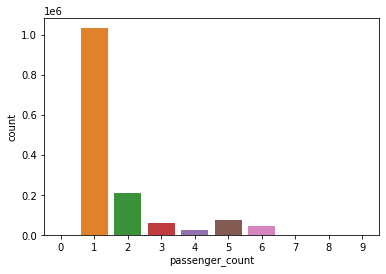

In [ ]:
sns.countplot('passenger_count',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


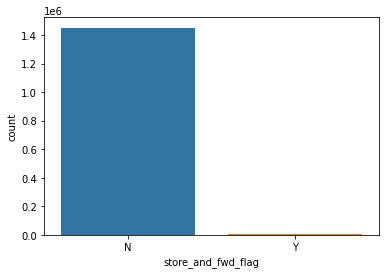

In [ ]:
sns.countplot('store_and_fwd_flag',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


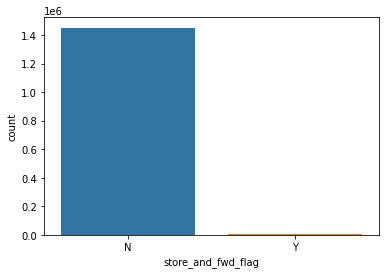

In [ ]:
sns.countplot('store_and_fwd_flag',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


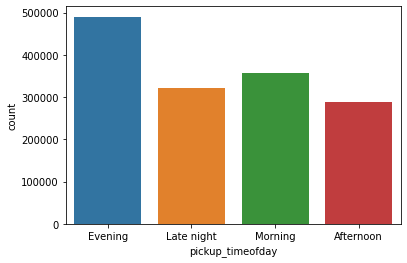

In [ ]:
sns.countplot('pickup_timeofday',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


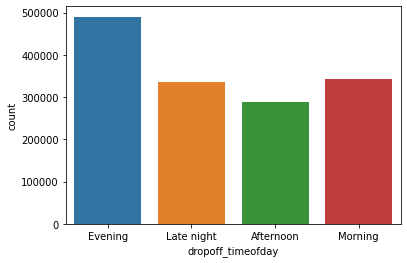

In [ ]:
sns.countplot('dropoff_timeofday',data=df)

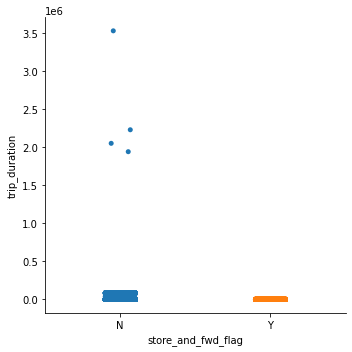

In [ ]:
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=df,kind="strip")

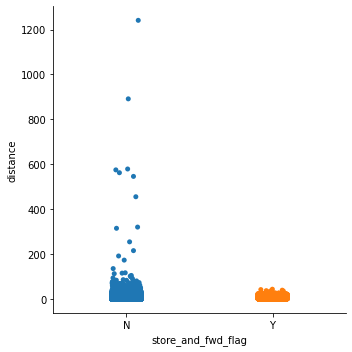

In [ ]:
sns.catplot(y='distance',x='store_and_fwd_flag',data=df,kind="strip")

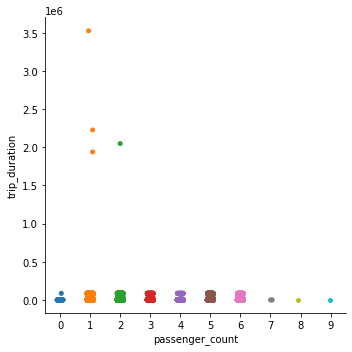

In [ ]:
sns.catplot(y='trip_duration',x='passenger_count',data=df,kind="strip")

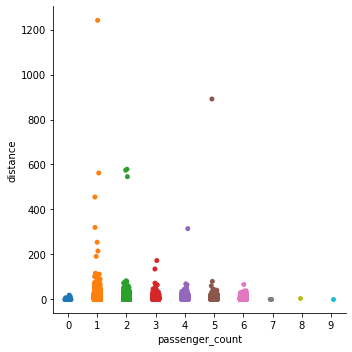

In [ ]:
sns.catplot(y='distance',x='passenger_count',data=df,kind="strip")

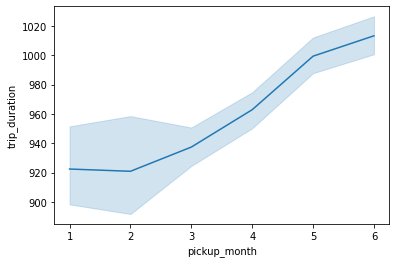

In [ ]:
sns.lineplot(x='pickup_month',y='trip_duration',data=df)

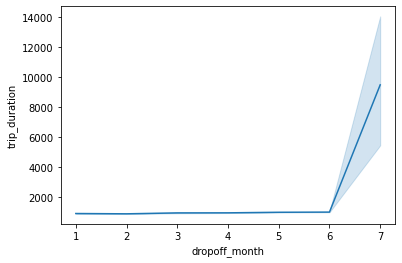

In [ ]:
sns.lineplot(x='dropoff_month',y='trip_duration',data=df)

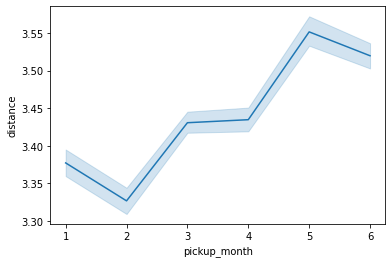

In [ ]:
sns.lineplot(x='pickup_month',y='distance',data=df)

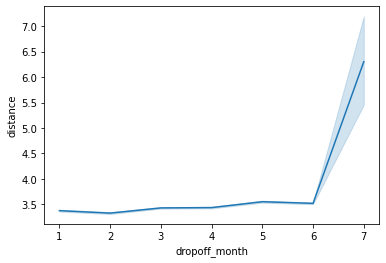

In [ ]:
sns.lineplot(x='dropoff_month',y='distance',data=df)

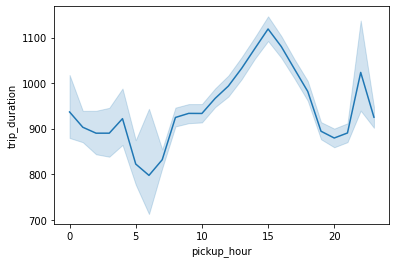

In [ ]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=df)

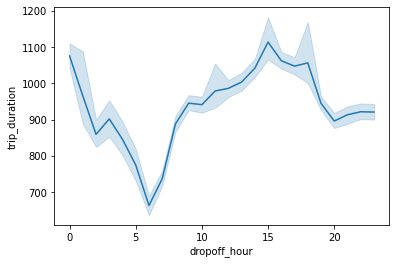

In [ ]:
sns.lineplot(x='dropoff_hour',y='trip_duration',data=df)

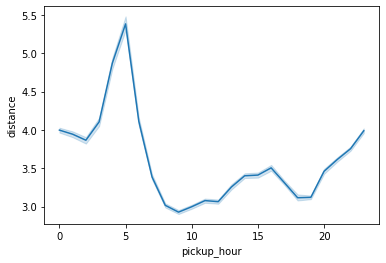

In [ ]:
sns.lineplot(x='pickup_hour',y='distance',data=df)

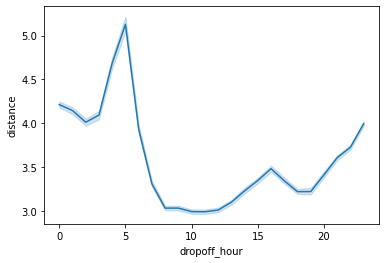

In [ ]:
sns.lineplot(x='dropoff_hour',y='distance',data=df)

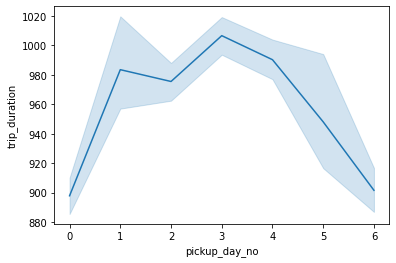

In [ ]:
sns.lineplot(x='pickup_day_no',y='trip_duration',data=df)

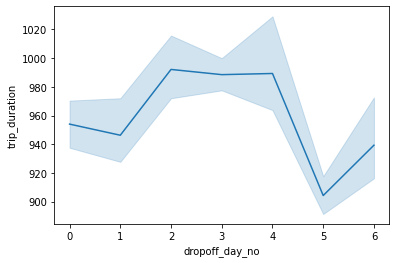

In [ ]:
sns.lineplot(x='dropoff_day_no',y='trip_duration',data=df)

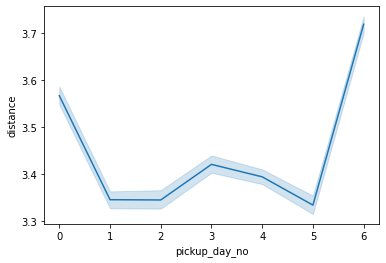

In [ ]:
sns.lineplot(x='pickup_day_no',y='distance',data=df)

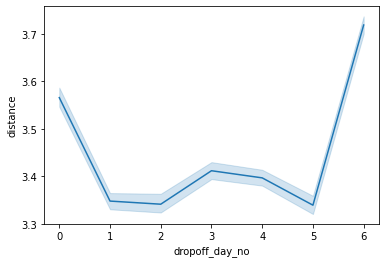

In [ ]:
sns.lineplot(x='dropoff_day_no',y='distance',data=df)

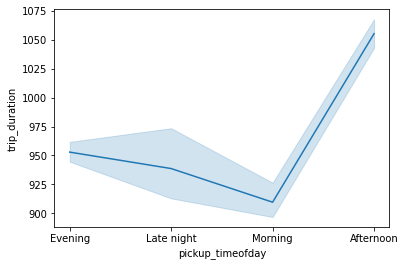

In [ ]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=df)

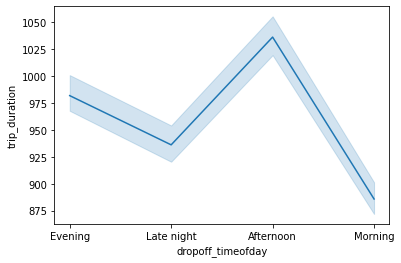

In [ ]:
sns.lineplot(x='dropoff_timeofday',y='trip_duration',data=df)

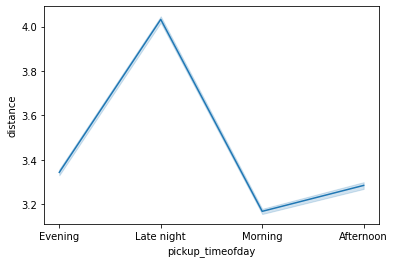

In [ ]:
sns.lineplot(x='pickup_timeofday',y='distance',data=df)

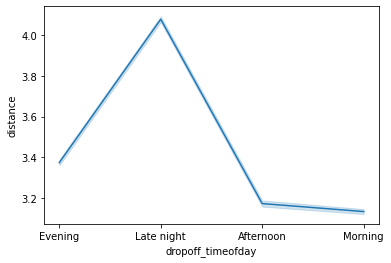

In [ ]:
sns.lineplot(x='dropoff_timeofday',y='distance',data=df)

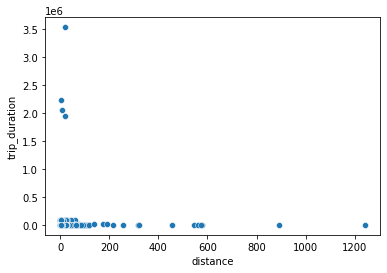

In [ ]:
sns.scatterplot(x='distance',y='trip_duration',data=df)

**lets convert all the categorical variable into numerical**

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_timeofday,dropoff_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,17,17,3,3,0,0,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,0,0,6,6,6,6,Late night,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385108,11,12,1,1,1,1,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501,19,19,4,4,2,2,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590,13,13,3,3,5,5,Afternoon,Afternoon


In [ ]:
df['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

In [ ]:
df['store_and_fwd_flag'].replace(to_replace="N",value=0,inplace=True)
df['store_and_fwd_flag'].replace(to_replace="Y",value=1,inplace=True)

In [ ]:
df['store_and_fwd_flag'].value_counts()

0    1450599
1       8045
Name: store_and_fwd_flag, dtype: int64

In [ ]:
df['pickup_timeofday'].value_counts()

Evening       489961
Morning       357477
Late night    321757
Afternoon     289449
Name: pickup_timeofday, dtype: int64

In [ ]:
df['pickup_timeofday'].replace(to_replace="Evening",value=1,inplace=True)
df['pickup_timeofday'].replace(to_replace="Morning",value=2,inplace=True)
df['pickup_timeofday'].replace(to_replace="Late night",value=3,inplace=True)
df['pickup_timeofday'].replace(to_replace="Afternoon",value=4,inplace=True)

In [ ]:
df['pickup_timeofday'].value_counts()

1    489961
2    357477
3    321757
4    289449
Name: pickup_timeofday, dtype: int64

In [ ]:
df['dropoff_timeofday'].value_counts()

Evening       489912
Morning       343679
Late night    336741
Afternoon     288312
Name: dropoff_timeofday, dtype: int64

In [ ]:
df['dropoff_timeofday'].replace(to_replace="Evening",value=1,inplace=True)
df['dropoff_timeofday'].replace(to_replace="Morning",value=2,inplace=True)
df['dropoff_timeofday'].replace(to_replace="Late night",value=3,inplace=True)
df['dropoff_timeofday'].replace(to_replace="Afternoon",value=4,inplace=True)

In [ ]:
df['dropoff_timeofday'].value_counts()

1    489912
2    343679
3    336741
4    288312
Name: dropoff_timeofday, dtype: int64

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_timeofday,dropoff_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,1.498523,17,17,3,3,0,0,1,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,1.805510,0,0,6,6,6,6,3,3
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,6.385108,11,12,1,1,1,1,2,4
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,1.485501,19,19,4,4,2,2,1,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,1.188590,13,13,3,3,5,5,4,4


**Divide the dataset into independent and dependent feature**

In [ ]:
X=df.drop(['id','pickup_datetime','dropoff_datetime','trip_duration'],axis=1)#independent
y=df['trip_duration']#dependent

In [ ]:
X.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_timeofday,dropoff_timeofday
0,2,1,-73.982155,40.767937,-73.964630,40.765602,0,1.498523,17,17,3,3,0,0,1,1
1,1,1,-73.980415,40.738564,-73.999481,40.731152,0,1.805510,0,0,6,6,6,6,3,3
2,2,1,-73.979027,40.763939,-74.005333,40.710087,0,6.385108,11,12,1,1,1,1,2,4
3,2,1,-74.010040,40.719971,-74.012268,40.706718,0,1.485501,19,19,4,4,2,2,1,1
4,2,1,-73.973053,40.793209,-73.972923,40.782520,0,1.188590,13,13,3,3,5,5,4,4


In [ ]:
y.head()

0     455
1     663
2    2124
3     429
4     435
Name: trip_duration, dtype: int64

In [ ]:
X.shape

(1458644, 16)

In [ ]:
y.shape

(1458644,)

**For feature selection i am using corealtion to check is there columns are correalted to each other**

In [ ]:
X.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_timeofday,dropoff_timeofday
vendor_id,1.000000,0.287415,0.007820,0.001742,0.001528,0.004496,-0.079872,0.008109,0.009299,0.009250,-0.006221,-0.006201,0.001311,0.001372,-0.009590,-0.008440
passenger_count,0.287415,1.000000,0.002169,-0.005125,-0.000343,-0.002762,-0.021815,0.010306,0.009101,0.008449,-0.002143,-0.002147,0.025191,0.025385,0.005217,0.005669
pickup_longitude,0.007820,0.002169,1.000000,0.022568,0.783582,0.100190,0.010799,0.259780,0.010150,0.010758,0.004474,0.004517,-0.016356,-0.017159,-0.004506,-0.008223
pickup_latitude,0.001742,-0.005125,0.022568,1.000000,0.114884,0.494038,-0.008223,-0.210354,0.010603,0.017043,-0.001439,-0.001506,-0.028976,-0.029176,-0.011937,-0.011074
dropoff_longitude,0.001528,-0.000343,0.783582,0.114884,1.000000,0.124873,0.008226,0.134033,-0.022455,-0.023361,0.004758,0.004795,-0.001130,-0.001081,0.014685,0.009544
dropoff_latitude,0.004496,-0.002762,0.100190,0.494038,0.124873,1.000000,-0.009818,-0.142128,0.013612,0.017246,-0.000607,-0.000652,-0.021762,-0.022132,-0.009414,-0.008961
store_and_fwd_flag,-0.079872,-0.021815,0.010799,-0.008223,0.008226,-0.009818,1.000000,0.026266,0.002245,0.002932,0.000403,0.000404,-0.003952,-0.003846,0.002610,0.001013
distance,0.008109,0.010306,0.259780,-0.210354,0.134033,-0.142128,0.026266,1.000000,-0.015813,-0.020874,0.015667,0.015839,0.007599,0.007986,0.020894,0.013122
pickup_hour,0.009299,0.009101,0.010150,0.010603,-0.022455,0.013612,0.002245,-0.015813,1.000000,0.933977,-0.003438,-0.003167,-0.084255,-0.080838,-0.306379,-0.293294
dropoff_hour,0.009250,0.008449,0.010758,0.017043,-0.023361,0.017246,0.002932,-0.020874,0.933977,1.000000,-0.004719,-0.005110,-0.088238,-0.092494,-0.325687,-0.311845


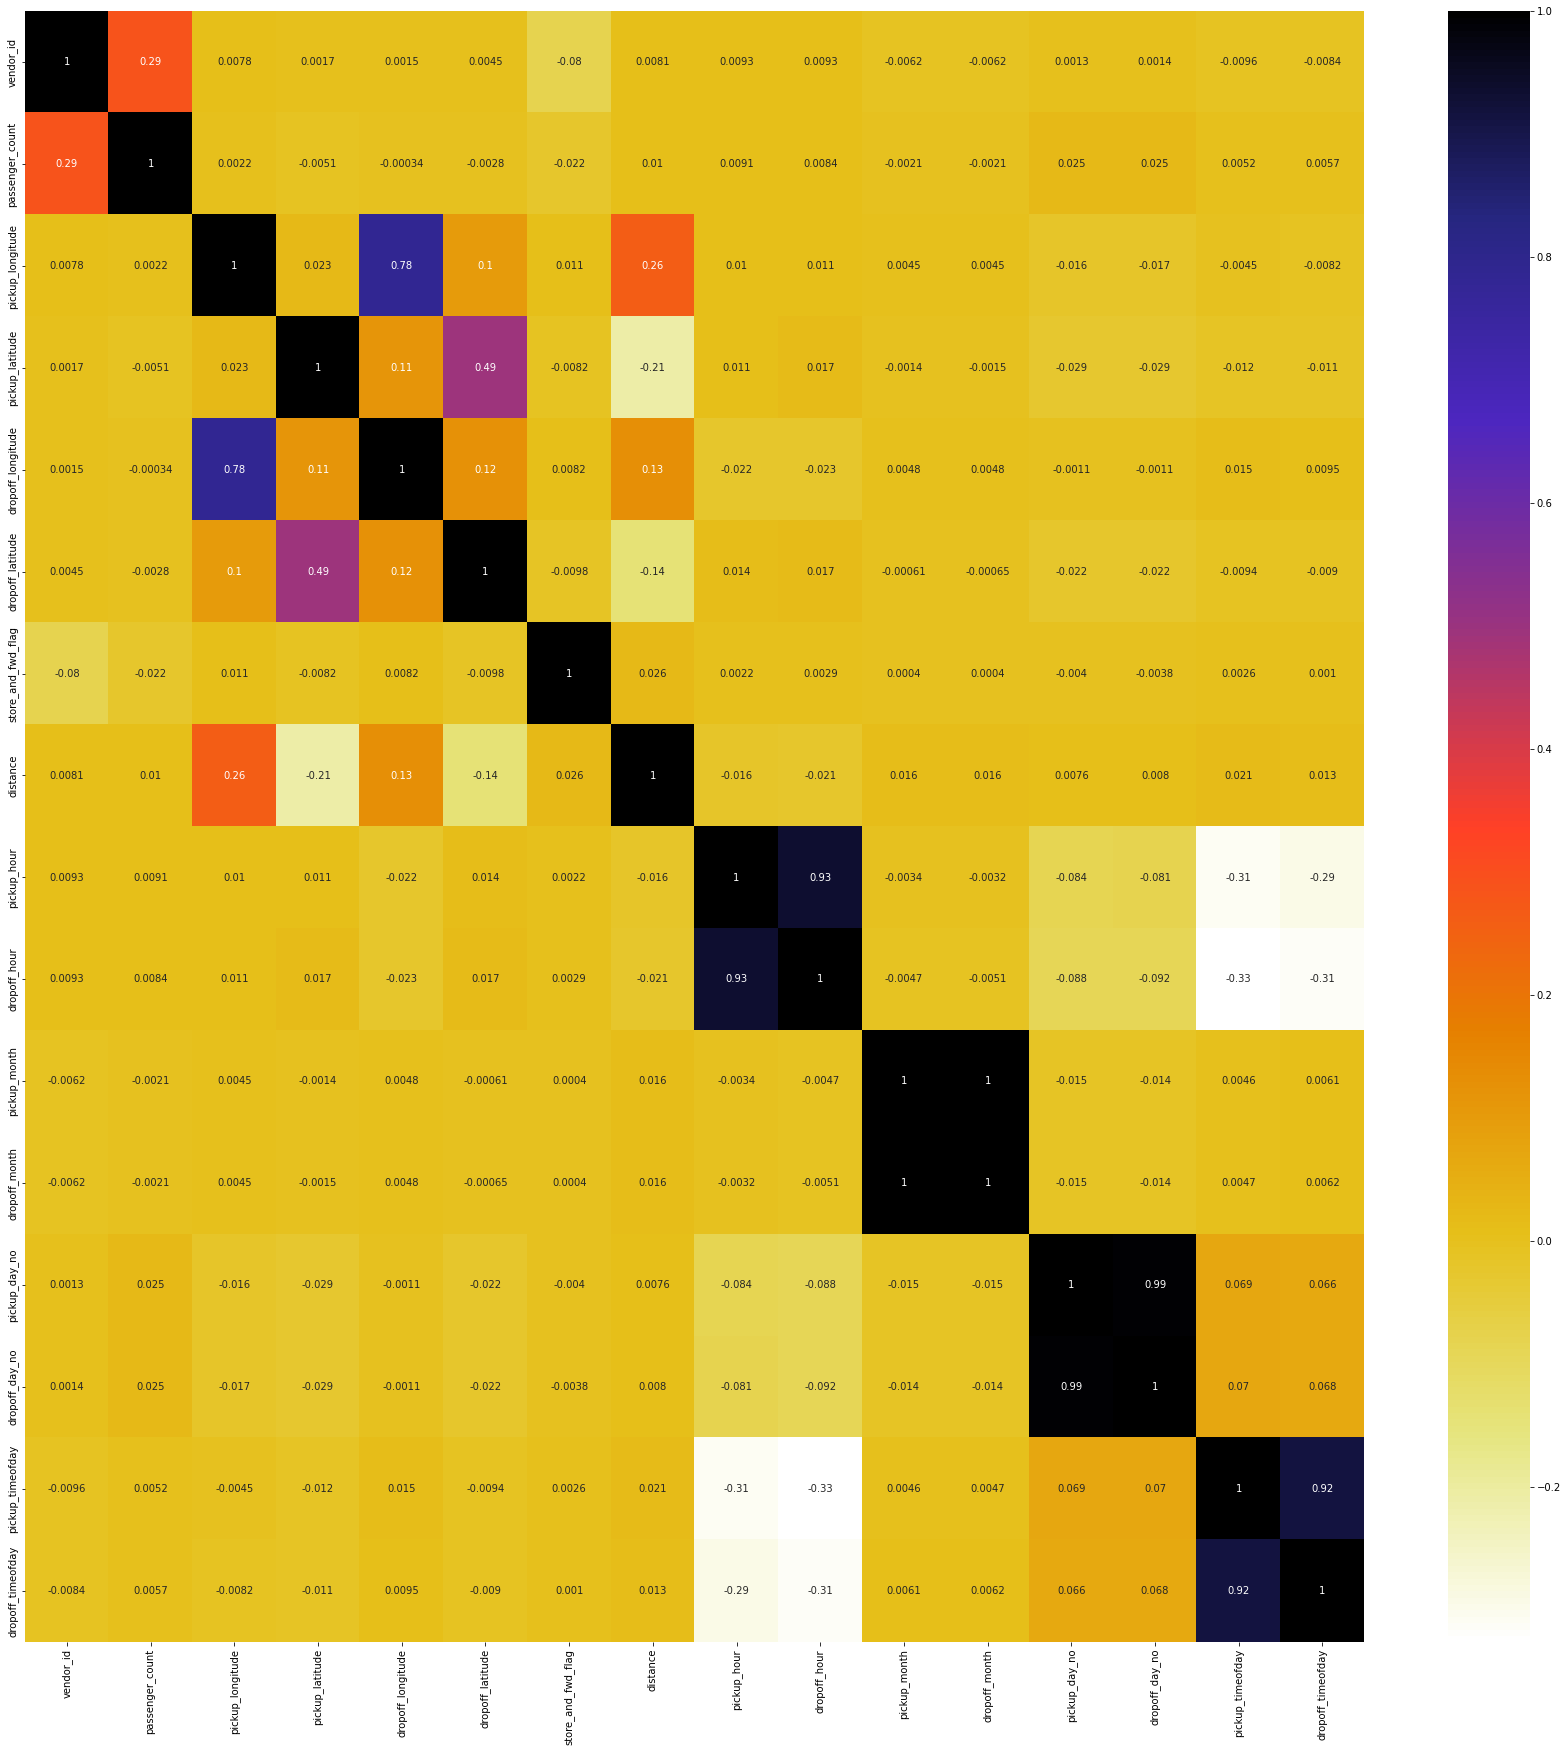

In [ ]:
plt.figure(figsize=(30,30))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X, 0.9)
len(set(corr_features))

4

**As we can see there is correaltion in dropoff's columns but i think this columns are import for model training i am noth droping this columns**

In [ ]:
corr_features

{'dropoff_day_no', 'dropoff_hour', 'dropoff_month', 'dropoff_timeofday'}

**Lets divide the independent and dependent feature into training and testing for predictive modeling**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape

(1021050, 16)

In [ ]:
y_train.shape

(1021050,)

In [ ]:
X_test.shape

(437594, 16)

In [ ]:
y_test.shape

(437594,)

**RandomForestRegressor**

In [ ]:
rdf=RandomForestRegressor()
rdf.fit(X_train,y_train)
y_pred=rdf.predict(X_test)

In [ ]:
y_pred

array([641.44, 961.24, 398.27, ..., 403.23, 967.04, 996.32])

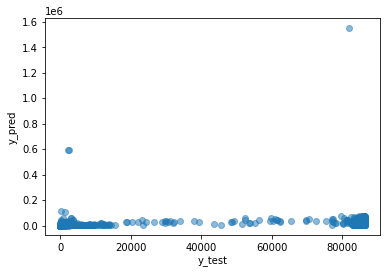

In [ ]:
plt.scatter(y_test,y_pred,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
print("MSE:",mean_squared_error(y_pred,y_test))
print("MAE:",mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(mean_absolute_error(y_pred,y_test)))

MSE: 12526150.30308663
MAE: 348.1590458130139
RMSE: 18.659020494468994


**AdaBoostRegressor**

In [ ]:
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
y_pred1=ada.predict(X_test)

In [ ]:
y_pred1

array([1236.2532423 , 1236.2532423 , 1161.02988933, ..., 1171.43035443,
       1138.95111005, 1197.8040004 ])

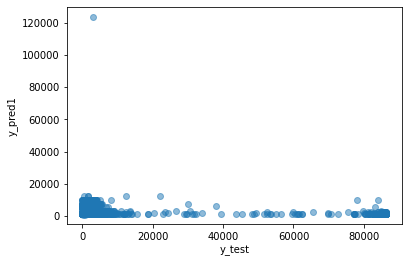

In [ ]:
plt.scatter(y_test,y_pred1,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred1")
plt.show()

In [ ]:
print("MSE:",mean_squared_error(y_pred1,y_test))
print("MAE:",mean_absolute_error(y_pred1,y_test))
print("RMSE:",np.sqrt(mean_absolute_error(y_pred1,y_test)))

MSE: 10253760.1971246
MAE: 736.96631954163
RMSE: 27.147123596094485


**GradientBoosting Regressor**

In [ ]:
gdr=GradientBoostingRegressor()
gdr.fit(X_train,y_train)
y_pred2=gdr.predict(X_test)

In [ ]:
y_pred2

array([ 918.08165135,  883.43112912,  508.12240833, ...,  600.64328921,
        925.23229129, 1050.64739383])

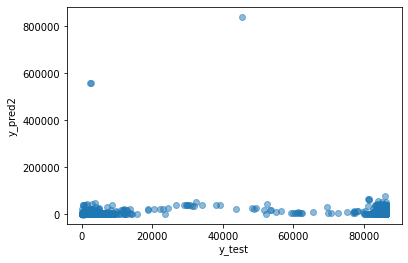

In [ ]:
plt.scatter(y_test,y_pred2,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred2")
plt.show()

In [ ]:
print("MSE:",mean_squared_error(y_pred2,y_test))
print("MAE:",mean_absolute_error(y_pred2,y_test))
print("RMSE:",np.sqrt(mean_absolute_error(y_pred2,y_test)))

MSE: 10715322.52637261
MAE: 384.99096855547015
RMSE: 19.621186726481916


**LGBMRegressor**

In [ ]:
lgbm=LGBMRegressor()
lgbm.fit(X_train,y_train)
y_pred3=lgbm.predict(X_test)

In [ ]:
y_pred3

array([752.8709334 , 754.05797979, 516.28370162, ..., 478.74357902,
       894.24712254, 997.67963073])

In [ ]:
r2_score(y_pred3,y_test)

0.6394693748922959

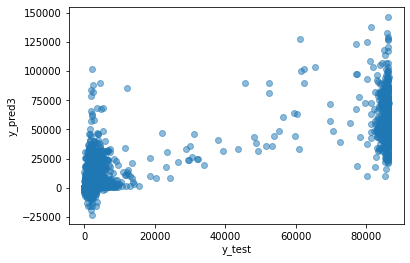

In [ ]:
plt.scatter(y_test,y_pred3,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred3")
plt.show()

In [ ]:
print("MSE:",mean_squared_error(y_pred3,y_test))
print("MAE:",mean_absolute_error(y_pred3,y_test))
print("RMSE:",np.sqrt(mean_absolute_error(y_pred3,y_test)))

MSE: 2309298.0364841223
MAE: 302.9439596989687
RMSE: 17.405285395504684


**XGBRegressor**

In [ ]:
xgb=xgboost.XGBRegressor()
xgb.fit(X_train,y_train)
y_pred4=xgb.predict(X_test)

[06:16:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
y_pred4

array([ 897.6792 ,  842.4671 ,  479.74066, ...,  633.64246,  916.6773 ,
       1022.9545 ], dtype=float32)

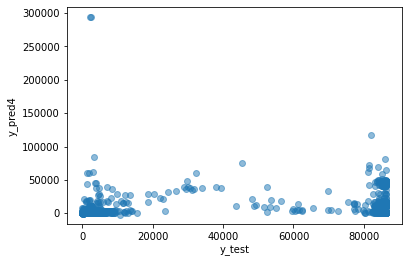

In [ ]:
plt.scatter(y_test,y_pred4,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred4")
plt.show()

In [ ]:
print("MSE:",mean_squared_error(y_pred4,y_test))
print("MAE:",mean_absolute_error(y_pred4,y_test))
print("RMSE:",np.sqrt(mean_absolute_error(y_pred4,y_test)))

MSE: 7918131.368595623
MAE: 379.7042660374338
RMSE: 19.486001797121794


**LinearRegresssion**

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred5=lr.predict(X_test)

In [ ]:
y_pred5

array([980.3490421 , 901.92600117, 825.57217817, ..., 844.36319964,
       983.17345698, 938.19945242])

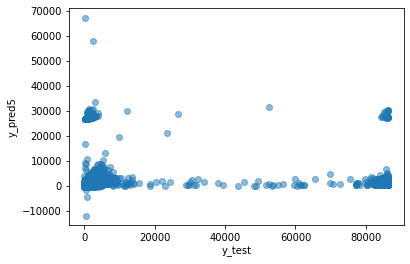

In [ ]:
plt.scatter(y_test,y_pred5,alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred5")
plt.show()

In [ ]:
print("MSE:",mean_squared_error(y_pred5,y_test))
print("MAE:",mean_absolute_error(y_pred5,y_test))
print("RMSE:",np.sqrt(mean_absolute_error(y_pred5,y_test)))

MSE: 9969082.766321125
MAE: 471.46738444629136
RMSE: 21.713299713454226


In [ ]:
X_test.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_day_no,dropoff_day_no,pickup_timeofday,dropoff_timeofday
67250,2,1,-73.985611,40.735943,-73.980331,40.760468,0,2.763053,7,7,6,6,2,2,2,2
1397036,2,1,-73.978394,40.764351,-73.991623,40.749859,0,1.959181,12,13,4,4,6,6,4,4
1021087,2,5,-73.989059,40.744389,-73.973381,40.748692,0,1.404774,2,2,6,6,6,6,3,3
951424,2,2,-73.990326,40.731136,-73.991264,40.748917,0,1.978663,17,17,5,5,3,3,1,1
707882,1,4,-73.789497,40.646675,-73.987137,40.759232,0,20.837774,17,19,5,5,3,3,1,1


**Prediction using RandomForest model**

In [ ]:
prediction=rdf.predict([[2	,1	,-73.985611	,40.735943	,-73.980331	,40.760468	,0	,2.763053	,7	,7	,6	,6	,2	,2	,2	,2]])
print("Trip Duration in secods:",prediction,"s")

Trip Duration in secods: [641.44] s


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


**Prediction Using LGBM Model**

In [ ]:
prediction=lgbm.predict([[2	,1	,-73.985611	,40.735943	,-73.980331	,40.760468	,0	,2.763053	,7	,7	,6	,6	,2	,2	,2	,2]])
print("Trip Duration in secods:",prediction,"s")

Trip Duration in secods: [752.8709334] s


**Conclusion: As in this model development of NYC trip duration in terms of MSE,MAE and RMSE RandomForest and LGBM this 2 algorithm performed way better then other algorithm while LGBM performed little better in comparision of RandomForest.**